IMPORTING THE DATASET 2 : Netflix Top Series and Movies

In [2]:
import pandas as pd 
file = "n_movies.csv"
movies_df = pd.read_csv(file)
movies_df.head(25)

,title,year,certificate,duration,Genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"Ralph Macchio, William Zabka, Courtney Hengg...","1,77,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"Claire Foy, Olivia Colman, Imelda Staunton, ...","1,99,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"Bob Odenkirk, Rhea Seehorn, Jonathan Banks, ...","5,01,384"
3,Devil in Ohio,-2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"Emily Deschanel, Sam Jaeger, Gerardo Celasco...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"Zach Aguilar, Kenichiro Ohashi, Emi Lo, Aoi...","15,413"
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"Tom Sturridge, Boyd Holbrook, Patton Oswalt,...","1,16,358"
6,Rick and Morty,(2013– ),TV-MA,23 min,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Gramm...","5,02,160"
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"Bryan Cranston, Aaron Paul, Anna Gunn, Bets...","18,31,340"
8,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"Morgan Taylor Campbell, Italia Ricci, Rhiann...","3,123"
9,Blonde,-2022,NC-17,166 min,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"Andrew Dominik , Stars: Ana de Armas, Lu...",935


CLEANING THE NON INTEGER VALUES FROM THE DATASET

In [3]:
# Check for missing values
missing_values = movies_df.isna().sum()
missing_values


title             0
year            527
certificate    3453
duration       2036
Genre            73
rating         1173
description       0
stars           403
votes          1173
dtype: int64

In [4]:

movies_df['rating'] = movies_df['rating'].fillna(movies_df['rating'].mean())

In [5]:
movies_df['certificate'] = movies_df['certificate'].fillna('Not Rated')
movies_df['Genre'] = movies_df['Genre'].fillna('Drama')

In [6]:
missing_values_after = movies_df.isna().sum()
print(missing_values_after)

title             0
year            527
certificate       0
duration       2036
Genre             0
rating            0
description       0
stars           403
votes          1173
dtype: int64


ANALYSIS OF THE DATASET

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
summary_stats = movies_df.describe()


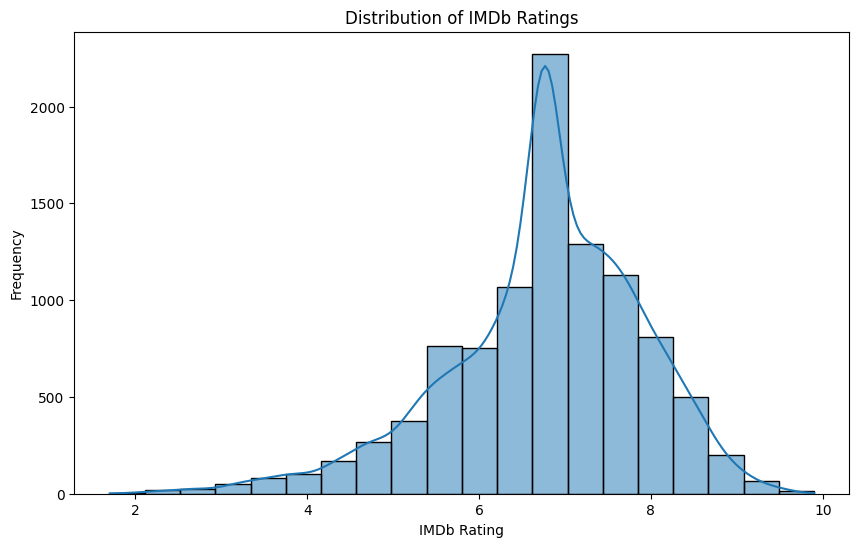

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

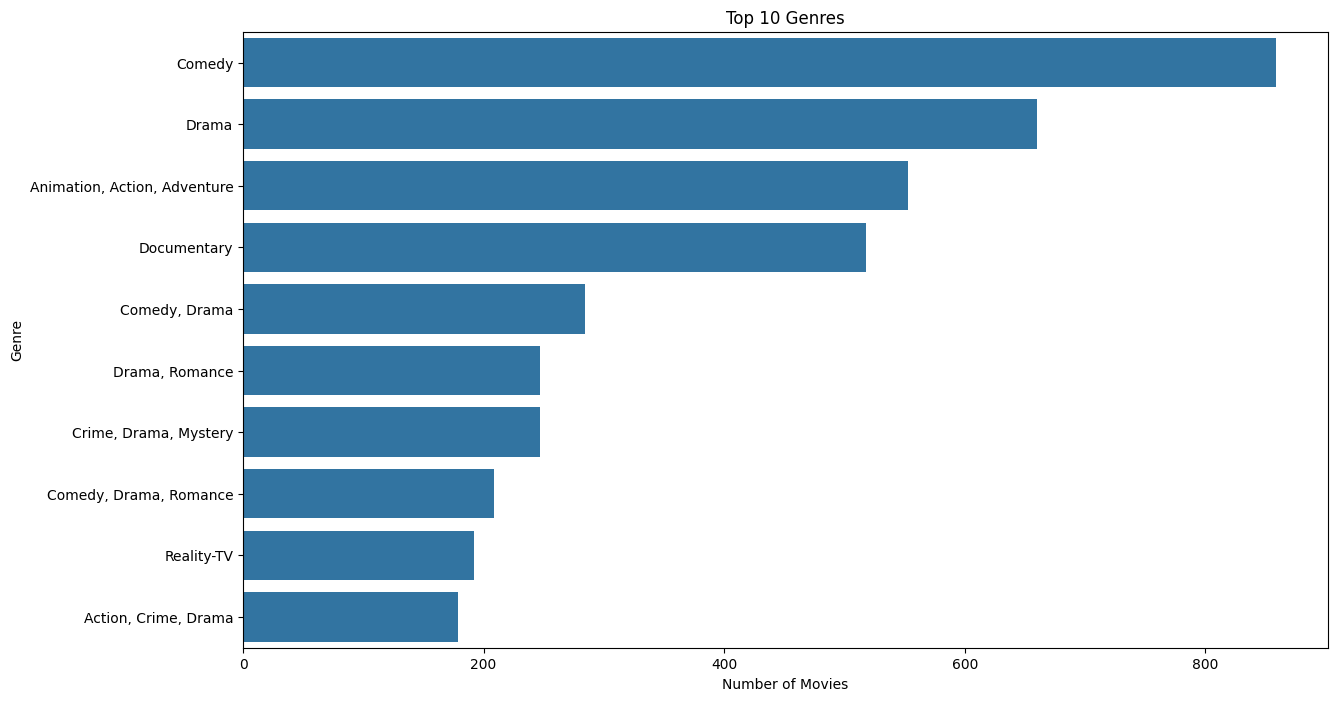

In [9]:
plt.figure(figsize=(14, 8))
genre_counts = movies_df['Genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


1.SUGGESTING THE USER MOVIES BASED ON HIS TASTES

In [10]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Split genre into a list of genres
movies_df['Genres_List'] = movies_df['Genre'].apply(lambda x: x.split(', '))

# Create a list of all unique genres
genre_list = list(set([item for sublist in movies_df['Genres_List'] for item in sublist]))

# Create binary columns for each genre
for genre in genre_list:
    movies_df[genre] = movies_df['Genres_List'].apply(lambda x: 1 if genre in x else 0)

# Prepare the feature set for KNN
knn_features = ['rating'] + genre_list
knn_data = movies_df[knn_features].dropna()

In [26]:
# Build the KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(knn_data)

NearestNeighbors()

In [27]:
fav_movie = input("Enter your favorite movie: ")
fav_genres = input("Enter your favorite genres (comma-separated): ").strip().split(',')

# Example input for KNN
fav_movie_index = movies_df[movies_df['title'] == fav_movie].index
if len(fav_movie_index) == 0:
    print(f"Sorry, '{fav_movie}' is not found in the series list.")
    exit()

fav_movie_index = fav_movie_index[0]
fav_movie_data = knn_data.loc[fav_movie_index].values.reshape(1, -1)

# Find nearest neighbors
distances, indices = knn_model.kneighbors(fav_movie_data)
recommended_indices = indices.flatten()

# Format and print recommendations
recommended_movies = movies_df.iloc[recommended_indices]['title'].values

print("\n--- Recommendations based on your preferences ---")
print(f"Favorite Movie: {fav_movie}")
print(f"Favorite Genres: {', '.join(fav_genres)}")
print("\nRecommended Movies:")
for i, movie in enumerate(recommended_movies, 1):
    print(f"{i}. {movie}")


--- Recommendations based on your preferences ---
Favorite Movie: Peaky Blinders
Favorite Genres: Drama

Recommended Movies:
1. Peaky Blinders
2. Peaky Blinders
3. Better Call Saul
4. Narcos: Mexico
5. Delhi Crime


c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


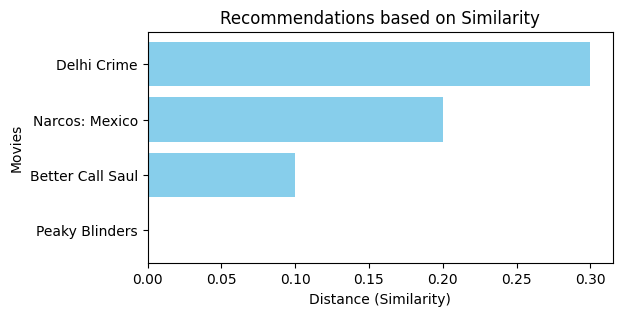

In [28]:
import matplotlib.pyplot as plt

# Example data for plotting
movies = recommended_movies
distances = distances.flatten()

# Plotting
plt.figure(figsize=(6 ,3))
plt.barh(movies[::-1], distances[::-1], color='skyblue')
plt.xlabel('Distance (Similarity)')
plt.ylabel('Movies')
plt.title('Recommendations based on Similarity')
plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
plt.show()


2.PREDICTING THE IMDB VALUE OF THE SHOW OR MOVIE IF AN ACTOR ACTS IN A PARCTICULAR GENERE

In [14]:
import pandas as pd

# Load the dataset
file_path = 'n_movies.csv'
data = pd.read_csv(file_path)

# Fill NaN values in 'votes' and 'rating' with the median of the columns
data['votes'] = data['votes'].str.replace(',', '')  # Remove commas in 'votes'
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')  # Convert to numeric, handle errors
data['votes'].fillna(data['votes'].median(), inplace=True)  # Fill NaN with median of 'votes' column
data['rating'].fillna(data['rating'].median(), inplace=True)  # Fill NaN with median of 'rating' column


C:\Users\celln\AppData\Local\Temp\ipykernel_22196\378386444.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['votes'].fillna(data['votes'].median(), inplace=True)  # Fill NaN with median of 'votes' column
C:\Users\celln\AppData\Local\Temp\ipykernel_22196\378386444.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [15]:
# One-hot encode the 'Genre' column
data['Genre'] = data['Genre'].str.split(', ')
genres = data['Genre'].explode().unique()

# Create a binary matrix for genres
genre_matrix = pd.DataFrame(0, index=data.index, columns=genres)

for idx, genre_list in data['Genre'].items():
    genre_matrix.loc[idx, genre_list] = 1


In [16]:
# Select the stars and genres columns for prediction
X = pd.concat([data['stars'], genre_matrix], axis=1)
y = data['rating']

# Convert column names to strings
X.columns = X.columns.astype(str)


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Perform one-hot encoding on the 'stars' column, ignoring unknown categories during transformation
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
column_transformer = ColumnTransformer(
    transformers=[
        ('stars', one_hot_encoder, ['stars'])
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create and train the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)


c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stars',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['stars'])])),
                ('regressor', LinearRegression())])

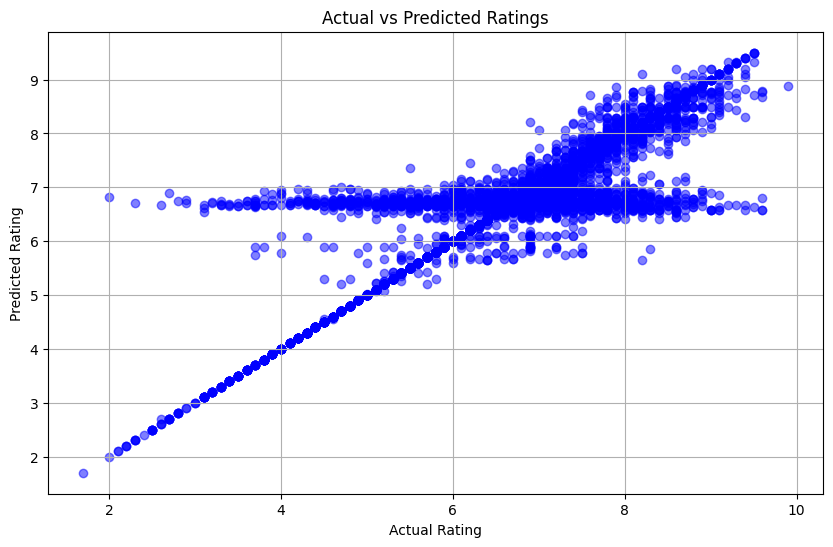

In [19]:
data['predicted_rating'] = pipeline.predict(X)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(data['rating'], data['predicted_rating'], color='blue', alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
# Predict and evaluate the model
import numpy as np
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")
print(f"Root Mean Squared Error: {rmse}")



Model Accuracy: 86.69%
Root Mean Squared Error: 1.0727500841887008


In [21]:
# Function to predict rating for user input
def predict_rating(stars, genres):
    # Create a DataFrame for the input
    input_data = pd.DataFrame(columns=X.columns)
    input_data.loc[0] = 0  # Initialize all columns to 0
    input_data['stars'] = stars
    
    # Set the corresponding genres to 1
    for genre in genres:
        if genre in input_data.columns:
            input_data[genre] = 1

    # Convert column names to strings
    input_data.columns = input_data.columns.astype(str)
    
    # Predict the rating
    predicted_rating = pipeline.predict(input_data)
    
    return predicted_rating[0]

# Example user input
stars_input = input("Enter the main stars (e.g., 'Star Name1, Star Name2'): ")
genres_input = input("Enter the genres (e.g., 'Action, Drama'): ").split(', ')

# Predict the rating based on user input
predicted_rating = predict_rating(stars_input, genres_input)
print(f"Predicted Rating: {predicted_rating}")


Predicted Rating: 6.664125506194715


3.PREDICTING THE MOVIE OR SHOW NAME WITH THE HELP OF PLOT AND LEAD CREW OR CAST

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [23]:
# Load the dataset
file_path = 'n_movies_updated.csv'
df = pd.read_csv(file_path)

# Combine plot and lead actor's name
df['Plot_Actor'] = df['description'].fillna('') + ' ' + df['star1'].fillna('')

# Encode movie titles as labels
label_encoder = LabelEncoder()
df['show_Label'] = label_encoder.fit_transform(df['title'])

# Select input and output features
X = df['Plot_Actor']
y = df['show_Label']

C:\Users\celln\AppData\Local\Temp\ipykernel_22196\2786454284.py:3: DtypeWarning: Columns (48,50,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,74,76,78,80,82,84,86,88,89,90,91,93,95,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create an SVM classifier with linear kernel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model on the training data
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear', random_state=42)

In [25]:
# Function to predict movie titles based on user input
def predict_movie_title(plot, actor, model, vectorizer, label_encoder):
    input_text = plot + ' ' + actor
    input_tfidf = vectorizer.transform([input_text])
    pred_label = model.predict(input_tfidf)
    movie_title = label_encoder.inverse_transform(pred_label)
    return movie_title[0]

# Example usage with user inputs
plot_input = input("Enter the plot description: ")
actor_input = input("Enter the lead actor's name: ")

predicted_movie = predict_movie_title(plot_input, actor_input, svm_model, vectorizer, label_encoder)
print(f'Predicted Movie Title: {predicted_movie}')

Predicted Movie Title: Avatar: The Last Airbender
